### Answers of Key Questions with some visualizations

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import json
import pandas as pd
import folium
from folium.plugins import HeatMap
from shapely.geometry import shape

#### setup DBs connection

In [3]:
#Setup Connection with the 1st DB
conn = sqlite3.connect('databases/deliveroo.db')
# Attach the other two databases
conn.execute("ATTACH DATABASE 'databases/takeaway.db' AS tw;")
conn.execute("ATTACH DATABASE 'databases/ubereats.db' AS ue;")

# Verify attached databases
databases = conn.execute("PRAGMA database_list;").fetchall()
print("Attached Databases:")
for db in databases:
    print(db)

Attached Databases:
(0, 'main', 'd:\\Becode\\delivery-market-analysis-with-SQL\\databases\\deliveroo.db')
(2, 'tw', 'd:\\Becode\\delivery-market-analysis-with-SQL\\databases\\takeaway.db')
(3, 'ue', 'd:\\Becode\\delivery-market-analysis-with-SQL\\databases\\ubereats.db')


#### 1- Price Distribution of Menu Items

##### Deliveroo DB

In [4]:
#SQL Querey For deliveroo
try:
    deliveroo = """                              
        SELECT 
            CASE
                WHEN price_float BETWEEN 1.0 AND 10.0 THEN '1.0-10.0'
                WHEN price_float > 10.0 AND price_float <= 20.0 THEN '10.0-20.0'
                WHEN price_float > 20.0 AND price_float <= 30.0 THEN '20.0-30.0'
                WHEN price_float > 30.0 AND price_float <= 50.0 THEN '30.0-50.0'
                ELSE '50.0+'
            END AS price_range,
            COUNT(*) AS item_count
        FROM menu_items
        WHERE price_float > 1.0
        GROUP BY price_range
        ORDER BY price_range;
        """
    deliveroo_results = conn.execute(deliveroo).fetchall()
    for price_range, item_count in deliveroo_results:
        print(f"Price Range: {price_range}, Item Count: {item_count}")
except sqlite3.OperationalError as e:
    print("Error:", e)

Price Range: 1.0-10.0, Item Count: 159003
Price Range: 10.0-20.0, Item Count: 47466
Price Range: 20.0-30.0, Item Count: 8090
Price Range: 30.0-50.0, Item Count: 2173
Price Range: 50.0+, Item Count: 1060


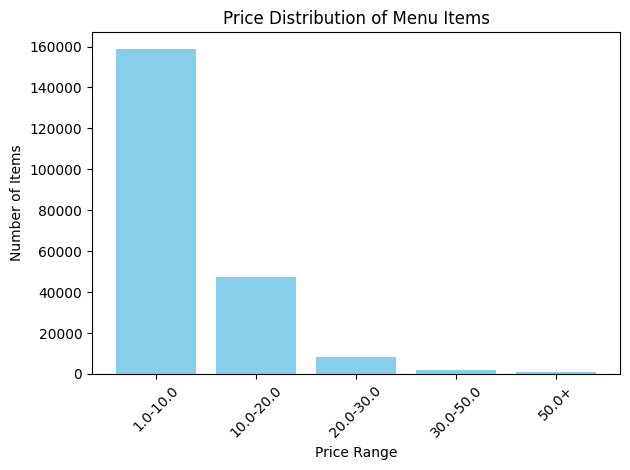

In [5]:
# Fetch results
# Prepare data for plotting
price_ranges = [x[0] for x in deliveroo_results]  # Get the price range labels
item_counts = [x[1] for x in deliveroo_results]  # Get the counts for each price range

# Create a bar plot (histogram)
plt.bar(price_ranges, item_counts, color='skyblue')
plt.title('Price Distribution of Menu Items')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the labels

# Show the plot
plt.show()

##### Takeawy DB

In [6]:
try:
    takeAwy = """                              
    SELECT 
        CASE
            WHEN price_float BETWEEN 1.0 AND 10.0 THEN '1.0-10.0'
            WHEN price_float > 10.0 AND price_float <= 20.0 THEN '10.0-20.0'
            WHEN price_float > 20.0 AND price_float <= 30.0 THEN '20.0-30.0'
            WHEN price_float > 30.0 AND price_float <= 50.0 THEN '30.0-50.0'
            ELSE '50.0+'
        END AS price_range,
        COUNT(*) AS item_count
    FROM tw.menuItems
    WHERE price_float > 1.0
    GROUP BY price_range
    ORDER BY price_range;
    """
    takeAwy_results = conn.execute(takeAwy).fetchall()
    for price_range, item_count in takeAwy_results:
        print(f"Price Range: {price_range}, Item Count: {item_count}")
except sqlite3.OperationalError as e:
    print("Error:", e)

Price Range: 1.0-10.0, Item Count: 215255
Price Range: 10.0-20.0, Item Count: 149249
Price Range: 20.0-30.0, Item Count: 18073
Price Range: 30.0-50.0, Item Count: 3208
Price Range: 50.0+, Item Count: 2093


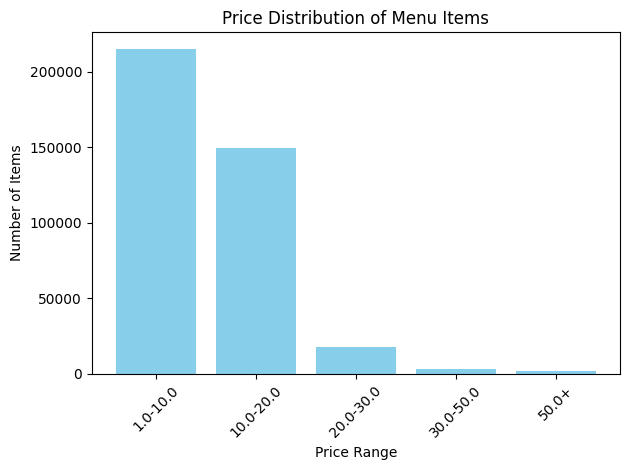

In [7]:
price_ranges = [x[0] for x in takeAwy_results]  # Get the price range labels
item_counts = [x[1] for x in takeAwy_results]  # Get the counts for each price range

# Create a bar plot (histogram)
plt.bar(price_ranges, item_counts, color='skyblue')
plt.title('Price Distribution of Menu Items')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the labels

# Show the plot
plt.show()

##### UberEats DB

In [8]:
try:
    uberEats="""                              
    SELECT 
        CASE
            WHEN price_float BETWEEN 1.0 AND 10.0 THEN '1.0-10.0'
            WHEN price_float > 10.0 AND price_float <= 20.0 THEN '10.0-20.0'
            WHEN price_float > 20.0 AND price_float <= 30.0 THEN '20.0-30.0'
            WHEN price_float > 30.0 AND price_float <= 50.0 THEN '30.0-50.0'
            ELSE '50.0+'
        END AS price_range,
        COUNT(*) AS item_count
    FROM ue.menu_items
    WHERE price_float > 1.0
    GROUP BY price_range
    ORDER BY price_range;
    """

    uberEats_results = conn.execute(uberEats).fetchall()
    for price_range, item_count in uberEats_results:
        print(f"Price Range: {price_range}, Item Count: {item_count}")
except sqlite3.OperationalError as e:
    print("Error:", e)

Price Range: 1.0-10.0, Item Count: 126775
Price Range: 10.0-20.0, Item Count: 59375
Price Range: 20.0-30.0, Item Count: 8277
Price Range: 30.0-50.0, Item Count: 2342
Price Range: 50.0+, Item Count: 1240


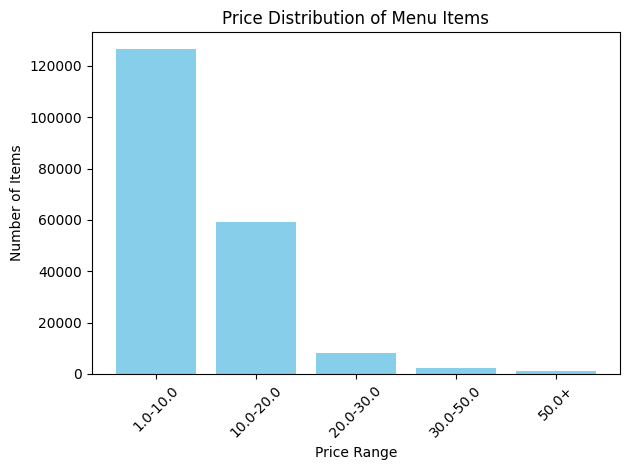

In [9]:
rice_ranges = [x[0] for x in uberEats_results]  # Get the price range labels
item_counts = [x[1] for x in uberEats_results]  # Get the counts for each price range

# Create a bar plot (histogram)
plt.bar(price_ranges, item_counts, color='skyblue')
plt.title('Price Distribution of Menu Items')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the labels

# Show the plot
plt.show()

#### 2-Distribution of restaurants per location

##### Deliveroo DB

In [6]:
try:
    # SQL query for deliveroo data
    deliveroo = """
        SELECT
            COUNT(restaurants.id) AS number_of_resturants,
            restaurants.postal_code
        FROM
            restaurants
        WHERE
            restaurants.postal_code <> ''
        GROUP BY
            restaurants.postal_code
        ORDER BY
            number_of_resturants DESC;
    """
    deliveroo_results = conn.execute(deliveroo).fetchall()
    for row in deliveroo_results:
        print(row)

except sqlite3.OperationalError as e:
    print("Error:", e)


# Load the GeoJSON file
geojson_path = "databases/georef-belgium-postal-codes.geojson"
with open(geojson_path, "r") as file:
    geojson_content = json.load(file)

# Parse and extract valid geometries and centroids
postal_codes = []
centroids = []

for feature in geojson_content["features"]:
    try:
        geom = shape(feature["geometry"])
        if geom.is_valid:
            postal_codes.append(feature["properties"].get("postcode"))  # Use `postcode` key
            centroids.append(geom.centroid)
    except Exception:
        continue

# Create a DataFrame for centroids
centroid_data = pd.DataFrame({
    "postal_code": postal_codes,
    "latitude": [centroid.y for centroid in centroids],
    "longitude": [centroid.x for centroid in centroids],
})

# Placeholder: SQL query for Deliveroo data
# Replace `conn` with your actual database connection
deliveroo_data = pd.read_sql_query(deliveroo, conn)

# Ensure postal codes are consistent as strings
centroid_data["postal_code"] = centroid_data["postal_code"].astype(str)
deliveroo_data["postal_code"] = deliveroo_data["postal_code"].astype(str)

# Merge centroid data with SQL query results
merged_data = pd.merge(centroid_data, deliveroo_data, on="postal_code", how="inner")

# Debugging: Check merged data
print("Merged Data Rows:", len(merged_data))
if merged_data.empty:
    print("Merged data is empty. Check for mismatched postal codes.")

# Create a folium map
m = folium.Map(location=[50.85, 4.35], zoom_start=8)

# Prepare data for the heatmap
if not merged_data.empty:
    heat_data = [
        [row["latitude"], row["longitude"], row["number_of_resturants"]]
        for _, row in merged_data.iterrows()
    ]

    # Add heatmap layer
    HeatMap(heat_data, radius=15, blur=10, max_zoom=10).add_to(m)

    # Add colored dots for Deliveroo locations
    for _, row in merged_data.iterrows():
        folium.CircleMarker(
            location=[row["latitude"], row["longitude"]],
            radius=4,  # Small dots
            color="turquoise",  # Deliveroo-specific color
            fill=True,
            fill_opacity=0.8,
            popup=f"Postal Code: {row['postal_code']}<br>Restaurants: {row['number_of_resturants']}",
        ).add_to(m)

# Save the map to an HTML file
output_path = "deliveroo_heatmap.html"
m.save(output_path)
print(f"Map saved as '{output_path}'")


(459, '2000')
(427, '9000')
(230, '3000')
(189, '8000')
(128, '2018')
(110, '2800')
(109, '8500')
(77, '3500')
(61, '1180')
(57, '8400')
(54, '1030')
(52, '2600')
(52, '2060')
(45, '1410')
(37, '1200')
(36, '8800')
(35, '1150')
(35, '1090')
(34, '9300')
(29, '9100')
(28, '2140')
(26, '1140')
(26, '1020')
(24, '3600')
(24, '2100')
(19, '8310')
(18, '8200')
(18, '2610')
(17, '2300')
(16, '1800')
(15, '9050')
(15, '1082')
(14, '3800')
(14, '2020')
(13, '1950')
(13, '1190')
(11, '9200')
(11, '1080')
(9, '1083')
(8, '9040')
(8, '2640')
(8, '2170')
(8, '1000')
(7, '3010')
(6, '1160')
(5, '8501')
(5, '3001')
(5, '1853')
(5, '1620')
(4, '2110')
(4, '1780')
(4, '1130')
(4, '1120')
(3, '3511')
(3, '2900')
(3, '2660')
(3, '1600')
(2, '8510')
(2, '8300')
(2, '2030')
(2, '1970')
(2, '1932')
(2, '1831')
(1, '9308')
(1, '9070')
(1, '9041')
(1, '9030')
(1, '4000')
(1, '3360')
(1, '3020')
(1, '2812')
(1, '2360')
(1, '2180')
(1, '2160')
(1, '2150')
(1, '2050')
(1, '1930')
(1, '1850')
(1, '1830')
(1, '17

##### Takeawy DB

In [7]:
# SQL query for Takeaway data
takeaway_query = """
SELECT 
    COUNT(inner_query.number_restaurants) AS number_of_resturants,
    inner_query.postal_code
FROM (
    SELECT 
        COUNT(DISTINCT tw.restaurants."primarySlug") AS number_restaurants,
        tw.locations.postalCode AS postal_code,
        tw.restaurants.name
    FROM 
        tw.restaurants
    INNER JOIN
        tw.locations_to_restaurants
    ON
        tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
    INNER JOIN
        tw.locations
    ON
        tw.locations_to_restaurants.location_id = tw.locations.ID
    WHERE
        tw.locations.postalCode IS NOT NULL
    GROUP BY 
        tw.restaurants.name, tw.restaurants.address
) AS inner_query
GROUP BY 
    inner_query.postal_code
ORDER BY 
    number_of_resturants DESC;
"""

# Replace `conn` with your actual database connection
takeaway_data = pd.read_sql_query(takeaway_query, conn)

# Ensure postal codes are consistent as strings
centroid_data["postal_code"] = centroid_data["postal_code"].astype(str)
takeaway_data["postal_code"] = takeaway_data["postal_code"].astype(str)

# Merge centroid data with SQL query results
merged_data = pd.merge(centroid_data, takeaway_data, on="postal_code", how="inner")

# Debugging: Check merged data
print("Takeaway Merged Data Rows:", len(merged_data))
if merged_data.empty:
    print("Merged data is empty. Check for mismatched postal codes.")

# Create a folium map
m = folium.Map(location=[50.85, 4.35], zoom_start=8, tiles="CartoDB positron")

# Prepare data for the heatmap
if not merged_data.empty:
    heat_data = [
        [row["latitude"], row["longitude"], row["number_of_resturants"]]
        for _, row in merged_data.iterrows()
    ]
    # Add heatmap layer
    HeatMap(heat_data, radius=15, blur=10, max_zoom=10).add_to(m)

# Add colored dots for Takeaway locations
for _, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=4,  # Small dots
        color="orange",  # Takeaway-specific color
        fill=True,
        fill_opacity=0.8,
        popup=f"Postal Code: {row['postal_code']}<br>Restaurants: {row['number_of_resturants']}",
    ).add_to(m)

# Save the map to an HTML file
output_path = "takeaway_heatmap.html"
m.save(output_path)
print(f"Map saved as '{output_path}'")


Takeaway Merged Data Rows: 243
Map saved as 'takeaway_heatmap.html'


##### uberEats DB

In [9]:
try:
        # SQL query for UberEats data
        ubereats = """
            SELECT
                    COUNT(DISTINCT ue.restaurants.id) AS number_of_restaurants,
                    SUBSTR(ue.restaurants.location__address, -4) AS postal_code
            FROM
                ue.restaurants
            WHERE
                LENGTH(SUBSTR(ue.restaurants.location__address, -4)) = 4
                AND SUBSTR(ue.restaurants.location__address, -4) GLOB '[0-9][0-9][0-9][0-9]'
            GROUP BY
                postal_code
            ORDER BY
                number_of_restaurants DESC;
                """
        results =conn.execute(ubereats).fetchall()
        for row in results:
            print(row)
    

    # Load the GeoJSON file
        geojson_path = "databases/georef-belgium-postal-codes.geojson"
        with open(geojson_path, "r") as file:
            geojson_content = json.load(file)

        # Parse and extract valid geometries and centroids
        postal_codes = []
        centroids = []

        for feature in geojson_content["features"]:
            try:
                geom = shape(feature["geometry"])
                if geom.is_valid:
                    postal_codes.append(feature["properties"].get("postcode"))  # Use `postcode` key
                    centroids.append(geom.centroid)
            except Exception:
                continue

        # Create a DataFrame for centroids
        centroid_data = pd.DataFrame({
            "postal_code": postal_codes,
            "latitude": [centroid.y for centroid in centroids],
            "longitude": [centroid.x for centroid in centroids],
        })

        # SQL query for UberEats data
        ubereats_query = """
            SELECT
                COUNT(DISTINCT ue.restaurants.id) AS number_of_restaurants,
                SUBSTR(ue.restaurants.location__address, -4) AS postal_code
            FROM
                ue.restaurants
            WHERE
                LENGTH(SUBSTR(ue.restaurants.location__address, -4)) = 4
                AND SUBSTR(ue.restaurants.location__address, -4) GLOB '[0-9][0-9][0-9][0-9]'
            GROUP BY
                postal_code
            ORDER BY
                number_of_restaurants DESC;
        """

        ubereats_data = pd.read_sql_query(ubereats_query, conn)

        # Ensure postal codes are consistent as strings
        centroid_data["postal_code"] = centroid_data["postal_code"].astype(str)
        ubereats_data["postal_code"] = ubereats_data["postal_code"].astype(str)

        # Merge centroid data with SQL query results
        merged_data = pd.merge(centroid_data, ubereats_data, on="postal_code", how="inner")

        # Debugging: Check merged data
        print("UberEats Merged Data Rows:", len(merged_data))
        if merged_data.empty:
            print("Merged data is empty. Check for mismatched postal codes.")

        # Create a folium map
        m = folium.Map(location=[50.85, 4.35], zoom_start=8, tiles="CartoDB positron")

        # Prepare data for the heatmap
        if not merged_data.empty:
            heat_data = [
                [row["latitude"], row["longitude"], row["number_of_restaurants"]]
                for _, row in merged_data.iterrows()
            ]
            # Add heatmap layer
            HeatMap(heat_data, radius=15, blur=10, max_zoom=10).add_to(m)

        # Add colored dots for UberEats locations
        for _, row in merged_data.iterrows():
            folium.CircleMarker(
                location=[row["latitude"], row["longitude"]],
                radius=4,  # Small dots
                color="green",  # UberEats-specific color
                fill=True,
                fill_opacity=0.8,
                popup=f"Postal Code: {row['postal_code']}<br>Restaurants: {row['number_of_restaurants']}",
            ).add_to(m)

        # Save the map to an HTML file
        output_path = "ubereats_heatmap.html"
        m.save(output_path)
        print(f"Map saved as '{output_path}'")

except sqlite3.OperationalError as e:
    print("Error:", e)

(331, '2000')
(306, '9000')
(170, '3000')
(113, '2018')
(85, '8000')
(77, '1070')
(68, '2800')
(66, '1180')
(60, '9300')
(54, '2600')
(48, '2100')
(47, '8400')
(44, '9100')
(43, '8500')
(43, '1410')
(41, '2060')
(39, '1090')
(39, '1030')
(39, '1020')
(37, '3500')
(36, '1200')
(36, '1000')
(32, '1140')
(31, '1080')
(29, '2140')
(29, '1150')
(27, '2170')
(26, '1800')
(25, '2610')
(24, '1083')
(19, '2300')
(19, '2020')
(18, '1190')
(17, '1950')
(17, '1500')
(16, '9040')
(16, '3600')
(16, '3090')
(16, '2110')
(16, '1930')
(16, '1082')
(15, '3010')
(15, '2640')
(15, '1600')
(13, '1780')
(12, '2900')
(12, '2180')
(11, '9050')
(11, '8300')
(11, '1932')
(11, '1332')
(11, '1310')
(11, '1120')
(10, '1702')
(10, '1700')
(10, '1081')
(10, '1050')
(9, '3001')
(9, '2660')
(9, '1480')
(8, '8310')
(8, '8200')
(8, '2930')
(7, '2440')
(7, '2400')
(6, '2550')
(6, '2500')
(6, '2150')
(5, '9800')
(5, '2950')
(5, '1652')
(5, '1640')
(5, '1620')
(5, '1160')
(4, '9140')
(4, '9032')
(4, '8790')
(4, '8530')
(4,

#### 3- Top 10 pizza restaurants by rating

In [12]:
import os
def load_restaurant_data(db_file, db_id, c, m=50):
    """Load and calculate weighted ratings for restaurant data from specified database."""
    if not os.path.exists(db_file):
        print(f"Error: {db_file} does not exist.")
        return pd.DataFrame()

    queries = {
        "deliveroo": f"""
            SELECT 
                name AS restaurant_name, 
                address, postal_code, uname,
                CAST(longitude AS REAL) AS longitude, 
                CAST(latitude AS REAL) AS latitude, 
                rating, CAST(rating_number AS INTEGER) AS rating_number,
                ((rating_number * rating) + ({m} * {c})) / (rating_number + {m}) AS weighted_rating,
                prep_time, delivery_time, min_order
            FROM restaurants
            WHERE rating IS NOT NULL AND rating_number > 0
        """,
        "takeaway": f"""
            SELECT 
                r.name AS restaurant_name, 
                r.address, r.city, r.primarySlug AS restaurant_id,
                CAST(r.longitude AS REAL) AS longitude, 
                CAST(r.latitude AS REAL) AS latitude, 
                r.ratings AS rating, CAST(r.ratingsNumber AS INTEGER) AS rating_number,
                ((r.ratingsNumber * r.ratings) + ({m} * {c})) / (r.ratingsNumber + {m}) AS weighted_rating,
                l.postalCode AS postal_code
            FROM restaurants r
            LEFT JOIN (
                SELECT
                    lr.restaurant_id, l.postalCode
                FROM locations_to_restaurants lr
                JOIN locations l ON lr.location_id = l.ID
                WHERE l.postalCode IS NOT NULL
            ) l ON r.primarySlug = l.restaurant_id
            WHERE r.ratings IS NOT NULL AND r.ratingsNumber > 0
        """,
        "ubereats": f"""
            SELECT 
                title AS restaurant_name, 
                location__address AS address, location__city AS city,
                CAST(location__longitude AS REAL) AS longitude, 
                CAST(location__latitude AS REAL) AS latitude, 
                rating__rating_value AS rating, CAST(rating__review_count AS INTEGER) AS rating_number,
                ((rating__review_count * rating__rating_value) + ({m} * {c})) / (rating__review_count + {m}) AS weighted_rating
            FROM restaurants
            WHERE rating__rating_value IS NOT NULL AND rating__review_count > 0
        """
    }

    try:
        conn = sqlite3.connect(db_file)
        df = pd.read_sql_query(queries[db_id], conn)
        if df.empty:
            print(f"Warning: No data from {db_id}.")
        df['longitude'] = df['longitude'].round(6)
        df['latitude'] = df['latitude'].round(6)
        df['source'] = db_id
        return df
    except sqlite3.OperationalError as e:
        print(f"Error with {db_id}: {e}")
        return pd.DataFrame()
    finally:
        conn.close()

# Define database files and identifiers
db_files = [
    ("databases/deliveroo.db", "deliveroo"),
    ("databases/takeaway.db", "takeaway"),
    ("databases/ubereats.db", "ubereats")
]

# Load and combine data
dataframes = [load_restaurant_data(file, db_id, c=4.0, m=50) for file, db_id in db_files]
stacked_df = pd.concat(dataframes, ignore_index=True)

# Fill missing values
stacked_df['city'] = stacked_df.get('city', pd.Series()).fillna("Unknown")
stacked_df['postal_code'] = stacked_df.get('postal_code', pd.Series()).fillna("Unknown")
stacked_df['address'] = stacked_df['address'].fillna("Unknown")
stacked_df['rating'] = stacked_df['rating'].fillna(0.0)

# Drop duplicates based on restaurant_name, address, rating and source
stacked_df = stacked_df.drop_duplicates(subset=['restaurant_name', 'address', 'rating_number', 'source'])

# Sort the DataFrame by weighted_rating in descending order
stacked_df = stacked_df.sort_values(by='weighted_rating', ascending=False)

# Display the updated DataFrame
print(f"Total rows after dropping duplicates: {stacked_df.shape[0]}")
stacked_df = stacked_df.sort_values(by='weighted_rating', ascending=False)

# Display the sorted DataFrame
stacked_df.head()


Total rows after dropping duplicates: 6413


,restaurant_name,address,postal_code,uname,longitude,latitude,rating,rating_number,weighted_rating,prep_time,delivery_time,min_order,source,city,restaurant_id
59738,De Echte Eethuis Carlos,Herseltsesteenweg 207,2230,NaN,4.835920,51.002308,5.0,599,4.922958,NaN,NaN,NaN,takeaway,Aarschot,eethuis-carlos-aarschot
8438,Veziroglu,Franklin Rooseveltlaan 100,1800,NaN,4.425172,50.931044,5.0,455,4.900990,NaN,NaN,NaN,takeaway,Vilvorde,veziroglu
2633,Snack Thieffry,Rue Pervyse 62,1140,NaN,4.399869,50.830792,4.9,3875,4.888535,NaN,NaN,NaN,takeaway,1040,snack-thieffry
4068,Sushiline,Chaussée De Louvain 470,1140,NaN,4.391012,50.853172,4.9,3036,4.885418,NaN,NaN,NaN,takeaway,Bruxelles,sushiline-bruxelles
60904,Snack Dekan,Place Cardinal Mercier 41,1731,NaN,4.329693,50.880092,4.9,2845,4.884456,NaN,NaN,NaN,takeaway,Jette,snack-dekan


#### 4- Locations offering kapsalons and their average price.

##### Deliveroo DB

In [72]:
try:
    deliveroo = """SELECT 
                        restaurants.postal_code, 
                        menu_items.name, 
                        ROUND(AVG(menu_items.price),2) AS average_kapsalon_price 
                    FROM 
                        restaurants
                        INNER JOIN 
                            menu_items
                        ON 
                            restaurants.id = menu_items.restaurant_id
                    WHERE 
                            menu_items.name = 'Kapsalon' 
                            AND menu_items.price IS NOT NULL 
                            AND menu_items.price > 0
                    GROUP BY 
                            restaurants.postal_code, menu_items.name
                    ORDER BY 
                            average_kapsalon_price DESC;"""
    deliveroo_results =conn.execute(deliveroo).fetchall()
    for row in deliveroo_results:
        print(row)
except sqlite3.OperationalError as e:
    print("Error:", e)

('9100', 'Kapsalon', 15.6)
('2800', 'Kapsalon', 14.9)
('8310', 'Kapsalon', 12.5)
('8500', 'Kapsalon', 11.11)
('2640', 'Kapsalon', 10.5)
('8000', 'Kapsalon', 9.67)
('1180', 'Kapsalon', 9.5)
('3000', 'Kapsalon', 9.25)
('8501', 'Kapsalon', 9.0)
('1140', 'Kapsalon', 8.5)
('1410', 'Kapsalon', 8.5)
('2000', 'Kapsalon', 8.5)
('2060', 'Kapsalon', 8.33)
('9050', 'Kapsalon', 7.5)
('1030', 'Kapsalon', 7.0)


##### TakeAwy DB

In [73]:
try:
    takeAwy = """SELECT
                        tw.locations.postalCode,
                        tw.menuItems.name,
                        ROUND(AVG(tw.menuItems.price),2) AS average_kapsalon_price
                    FROM
                        tw.restaurants
                        INNER JOIN
                            tw.menuItems
                    ON
                        tw.restaurants.primarySlug = tw.menuItems.primarySlug
                    INNER JOIN
                        tw.locations_to_restaurants
                    ON
                        tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
                    INNER JOIN
                        tw.locations
                    ON
                        tw.locations_to_restaurants.location_id = tw.locations.ID
                    WHERE
                        tw.menuItems.name = 'Kapsalon'
                        AND tw.menuItems.price > 0
                        AND tw.menuItems.price IS NOT NULL
                        AND tw.locations.postalCode IS NOT NULL
                    GROUP BY
                        tw.locations.postalCode, tw.menuItems.name
                    ORDER BY
                        average_kapsalon_price DESC;"""
    takeAwy_results =conn.execute(takeAwy).fetchall()
    for row in takeAwy_results:
            print(row)
except sqlite3.OperationalError as e:
        print("Error:", e)

(8553, 'Kapsalon', 14.5)
(8572, 'Kapsalon', 14.5)
(8573, 'Kapsalon', 14.5)
(8581, 'Kapsalon', 14.5)
(8700, 'Kapsalon', 14.5)
(9636, 'Kapsalon', 14.5)
(9680, 'Kapsalon', 14.5)
(9681, 'Kapsalon', 14.5)
(9700, 'Kapsalon', 14.5)
(9770, 'Kapsalon', 14.5)
(9771, 'Kapsalon', 14.5)
(9772, 'Kapsalon', 14.5)
(9790, 'Kapsalon', 14.5)
(9831, 'Kapsalon', 14.5)
(9850, 'Kapsalon', 14.5)
(8540, 'Kapsalon', 14.25)
(8570, 'Kapsalon', 14.25)
(8710, 'Kapsalon', 14.25)
(8720, 'Kapsalon', 14.25)
(8790, 'Kapsalon', 14.25)
(8792, 'Kapsalon', 14.25)
(8000, 'Kapsalon', 14.0)
(8200, 'Kapsalon', 14.0)
(8310, 'Kapsalon', 14.0)
(8470, 'Kapsalon', 14.0)
(8531, 'Kapsalon', 14.0)
(8780, 'Kapsalon', 14.0)
(8791, 'Kapsalon', 14.0)
(8460, 'Kapsalon', 13.0)
(8450, 'Kapsalon', 12.67)
(1745, 'Kapsalon', 12.5)
(1785, 'Kapsalon', 12.5)
(8800, 'Kapsalon', 12.5)
(8830, 'Kapsalon', 12.5)
(8840, 'Kapsalon', 12.5)
(8890, 'Kapsalon', 12.5)
(8920, 'Kapsalon', 12.5)
(8980, 'Kapsalon', 12.5)
(9630, 'Kapsalon', 12.25)
(9750, 'Kapsalon'

##### UberEats DB

In [74]:
try:
    uberEats = """SELECT 
                    SUBSTR(ue.restaurants.location__address, -4) AS postal_code, 
                    ue.menu_items.name, 
                    CAST(ROUND(AVG(ue.menu_items.price) / 100, 2) AS FLOAT) AS average_kapsalon_price
                FROM 
                    ue.menu_items
                INNER JOIN 
                    ue.restaurants 
                ON 
                    ue.menu_items.restaurant_id = ue.restaurants.id
                WHERE 
                    CAST(ue.menu_items.price AS FLOAT) > 0 
                    AND ue.menu_items.price IS NOT NULL
                    AND ue.menu_items.name = 'Kapsalon'
                    AND SUBSTR(ue.restaurants.location__address, -4) IS NOT NULL
                GROUP BY 
                    SUBSTR(ue.restaurants.location__address, -4), ue.menu_items.name
                ORDER BY 
                    average_kapsalon_price DESC;"""
    uberEats_results =conn.execute(uberEats).fetchall()
    for row in uberEats_results:
            print(row)
except sqlite3.OperationalError as e:
        print("Error:", e)


('8500', 'Kapsalon', 0.14)
('8790', 'Kapsalon', 0.14)
('8301', 'Kapsalon', 0.13)
('9320', 'Kapsalon', 0.13)
('2800', 'Kapsalon', 0.12)
('9300', 'Kapsalon', 0.12)
('2930', 'Kapsalon', 0.11)
('1180', 'Kapsalon', 0.1)
('1980', 'Kapsalon', 0.1)
('2170', 'Kapsalon', 0.1)
('2600', 'Kapsalon', 0.1)
('2640', 'Kapsalon', 0.1)
('3001', 'Kapsalon', 0.1)
('3600', 'Kapsalon', 0.1)
('9000', 'Kapsalon', 0.1)
('2000', 'Kapsalon', 0.09)
('2060', 'Kapsalon', 0.09)
('2160', 'Kapsalon', 0.09)
('2627', 'Kapsalon', 0.09)
('8000', 'Kapsalon', 0.09)
('8400', 'Kapsalon', 0.09)
('9100', 'Kapsalon', 0.09)
('1030', 'Kapsalon', 0.08)
('1083', 'Kapsalon', 0.08)
('2840', 'Kapsalon', 0.08)
('3090', 'Kapsalon', 0.08)
('1800', 'Kapsalon', 0.07)
('8560', 'Kapsalon', 0.07)
('9050', 'Kapsalon', 0.07)
('1480', 'Kapsalon', 0.05)


#### Compare restaurant distributions across UberEats, Deliveroo, and Takeaway. What are some of the market trends?

('Deliveroo', 459, '2000')
('Deliveroo', 427, '9000')
('Takeaway', 413, 2020)
('Takeaway', 334, 9000)
('UberEats', 331, '2000')
('UberEats', 306, '9000')
('Takeaway', 250, 1140)
('Deliveroo', 230, '3000')
('Deliveroo', 189, '8000')
('Takeaway', 177, 1800)
('UberEats', 170, '3000')
('Takeaway', 140, 1702)
('Takeaway', 133, 2060)
('Deliveroo', 128, '2018')
('UberEats', 113, '2018')
('Deliveroo', 110, '2800')
('Deliveroo', 109, '8500')
('Takeaway', 106, 2800)
('Takeaway', 86, 1932)
('UberEats', 85, '8000')
('Deliveroo', 77, '3500')
('Takeaway', 77, 3210)
('UberEats', 77, '1070')
('Takeaway', 74, 8450)
('UberEats', 68, '2800')
('UberEats', 66, '1180')
('Takeaway', 63, 1620)
('Deliveroo', 61, '1180')
('Takeaway', 60, 8200)
('UberEats', 60, '9300')
('Takeaway', 59, 3500)
('Deliveroo', 57, '8400')
('Deliveroo', 54, '1030')
('Takeaway', 54, 1700)
('UberEats', 54, '2600')
('Deliveroo', 52, '2600')
('Deliveroo', 52, '2060')
('Takeaway', 52, 9300)
('Takeaway', 51, 1831)
('Takeaway', 51, 1602)
('T

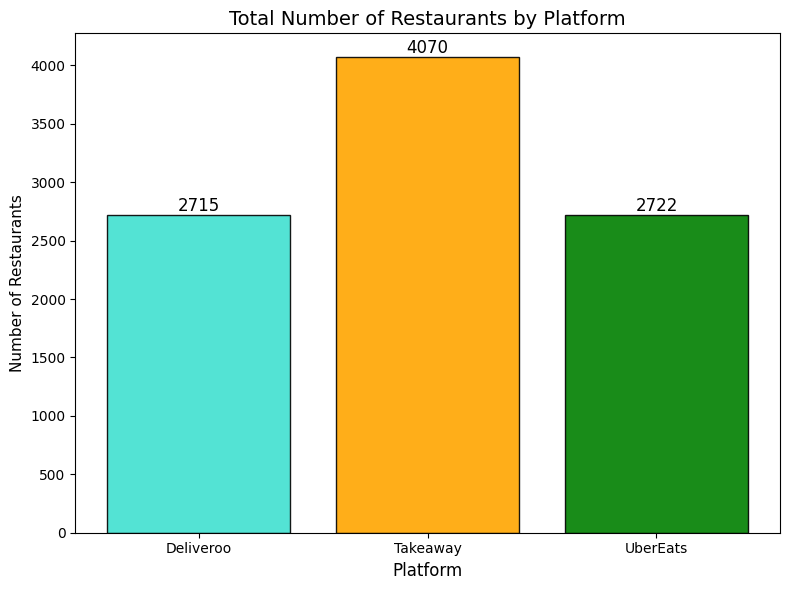

In [15]:
combined_query = """
    SELECT 
        'Deliveroo' AS platform, 
        COUNT(restaurants.id) AS number_of_restaurants, 
        cast(restaurants.postal_code as text) as postal_code
    FROM 
        restaurants
    WHERE 
        restaurants.postal_code <> ''
    GROUP BY 
        restaurants.postal_code

    UNION ALL

    SELECT 
        'Takeaway' AS platform, 
        COUNT(inner_query.number_restaurants) AS number_of_resturants,
    inner_query.postal_code AS postal_code
FROM (
    SELECT 
        COUNT(DISTINCT tw.restaurants."primarySlug") AS number_restaurants,
        tw.locations.postalCode AS postal_code,
        tw.restaurants.name
    FROM 
        tw.restaurants
    INNER JOIN
        tw.locations_to_restaurants
    ON
        tw.restaurants.primarySlug = tw.locations_to_restaurants.restaurant_id
    INNER JOIN
        tw.locations
    ON
        tw.locations_to_restaurants.location_id = tw.locations.ID
    WHERE
        tw.locations.postalCode IS NOT NULL
    GROUP BY 
        tw.restaurants.name, tw.restaurants.address
) AS inner_query
GROUP BY 
    inner_query.postal_code
    UNION ALL

    SELECT 
        'UberEats' AS platform, 
        COUNT(DISTINCT ue.restaurants.id) AS number_of_restaurants,
                SUBSTR(ue.restaurants.location__address, -4) AS postal_code
        FROM
            ue.restaurants
        WHERE
            LENGTH(SUBSTR(ue.restaurants.location__address, -4)) = 4
            AND SUBSTR(ue.restaurants.location__address, -4) GLOB '[0-9][0-9][0-9][0-9]'
        GROUP BY
            postal_code
        ORDER BY
            number_of_restaurants DESC;
"""
results = conn.execute(combined_query).fetchall()
for row in results:
        print(row)
df = pd.read_sql_query(combined_query, conn)

# Ensure 'number_of_restaurants' is numeric
df["number_of_restaurants"] = pd.to_numeric(df["number_of_restaurants"])

# 1. Aggregate total restaurants by platform
platform_totals = df.groupby("platform")["number_of_restaurants"].sum()

# Plot: Total Number of Restaurants by Platform with styling
plt.figure(figsize=(8, 6))
bars = plt.bar(
    platform_totals.index,
    platform_totals.values,
    color=["#40E0D0", "orange", "green"],  # Match colors to Deliveroo, Takeaway, UberEats
    alpha=0.9,
    edgecolor="black",
)

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=12
    )

# Title and labels
plt.title("Total Number of Restaurants by Platform", fontsize=14)
plt.ylabel("Number of Restaurants", fontsize=11)
plt.xlabel("Platform", fontsize=12)
plt.xticks(rotation=0, fontsize=10)

# Tight layout for clean appearance
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# Load the GeoJSON file
geojson_path = "databases/georef-belgium-postal-codes.geojson"
with open(geojson_path, "r") as file:
    geojson_content = json.load(file)

# Parse and extract valid geometries and centroids
postal_codes = []
centroids = []

for feature in geojson_content["features"]:
    try:
        geom = shape(feature["geometry"])
        if geom.is_valid:
            postal_codes.append(feature["properties"].get("postcode"))  # Use `postcode` key
            centroids.append(geom.centroid)
    except Exception:
        continue

# Create a DataFrame for centroids
centroid_data = pd.DataFrame({
    "postal_code": postal_codes,
    "latitude": [centroid.y for centroid in centroids],
    "longitude": [centroid.x for centroid in centroids],
})

# Placeholder for SQL query results
df = pd.read_sql_query(combined_query, conn)

# Ensure postal codes are consistent as strings
centroid_data["postal_code"] = centroid_data["postal_code"].astype(str)
df["postal_code"] = df["postal_code"].astype(str)

# Merge centroid data with the SQL query results
merged_data = pd.merge(centroid_data, df, on="postal_code", how="inner")

# Create a folium map with a different tile layer
m = folium.Map(location=[50.85, 4.35], zoom_start=8, tiles="CartoDB positron")

# Prepare data for the heatmap
heat_data = [
    [row["latitude"], row["longitude"], row["number_of_restaurants"]]
    for _, row in merged_data.iterrows()
]

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=10).add_to(m)

# Add colored dots for each platform
platform_colors = {"Deliveroo": "#40E0D0", "Takeaway": "orange", "UberEats": "green"}  # Assign colors
for _, row in merged_data.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=4,  # Small dots
        color=platform_colors.get(row["platform"], "gray"),  # Default color if platform not in dict
        fill=True,
        fill_opacity=0.8,
        popup=f"Platform: {row['platform']}<br>Postal Code: {row['postal_code']}<br>Restaurants: {row['number_of_restaurants']}",
    ).add_to(m)

# Save the map to an HTML file
output_path = "restaurant_heatmap_with_colored_dots.html"
m.save(output_path)
print(f"Map with heatmap and colored dots saved as '{output_path}'")


Map with heatmap and colored dots saved as 'restaurant_heatmap_with_colored_dots.html'


#### Detaching DBs and  Closing Connections

In [ ]:
# Detach the databases when done
conn.execute("DETACH DATABASE tw;")
conn.execute("DETACH DATABASE ue;")

# Close the connection
conn.close()